In [1]:
import matplotlib.pyplot as plt
import collections
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import time
import scipy.cluster.hierarchy as sch

iris = load_iris()

In [2]:
def purity(result, label):
    # 计算纯度

    total_num = len(label)
    cluster_counter = collections.Counter(result)
    original_counter = collections.Counter(label)

    t = []
    for k in cluster_counter:
        p_k = []
        for j in original_counter:
            count = 0
            for i in range(len(result)):
                if result[i] == k and label[i] == j: # 求交集
                    count += 1
            p_k.append(count)
        temp_t = max(p_k)
        t.append(temp_t)
    
    print("purity = " + str(sum(t)/total_num))

purity = 0.8933333333333333
cost_time = 0.003875732421875


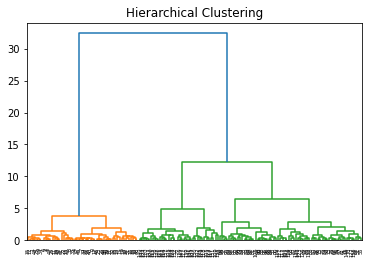

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
clk_id = time.CLOCK_REALTIME 

t1 = time.clock_gettime(clk_id)
model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward',compute_full_tree=False)


model.fit(iris.data)

purity(iris.target,model.labels_)

t2 = time.clock_gettime(clk_id)

print("cost_time = " + str(t2 - t1))
dis=sch.linkage(iris.data,metric='euclidean',method='ward')

sch.dendrogram(dis)
plt.title('Hierarchical Clustering')
plt.show()
print(model.labels_)
print(iris.target)


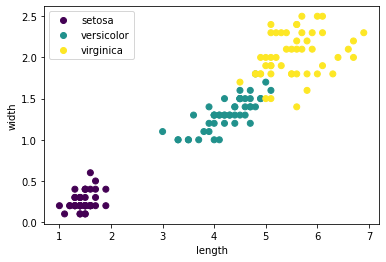

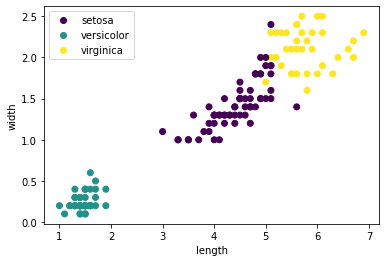

In [4]:
# 使用原本的標籤來繪圖
scatter = plt.scatter(iris.data[:,2], iris.data[:,3], c=iris.target)
plt.xlabel('length')
plt.ylabel('width')
plt.legend( handles= scatter.legend_elements()[0], labels= iris.target_names.tolist())
plt.show()

# 這張圖用KMeans分群好的label來作圖
scatter = plt.scatter(iris.data[:,2], iris.data[:,3], c=model.labels_)
plt.xlabel('length')
plt.ylabel('width')
plt.legend( handles= scatter.legend_elements()[0], labels= iris.target_names.tolist())
# 以星號標示中心點
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


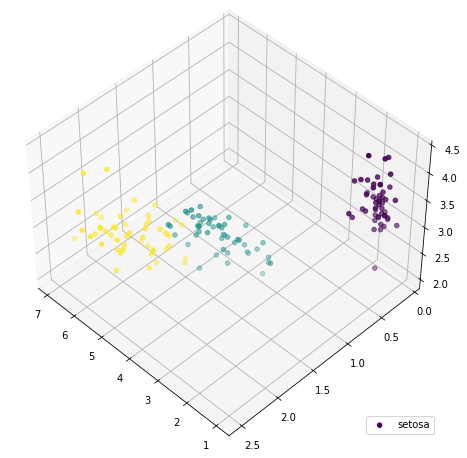

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


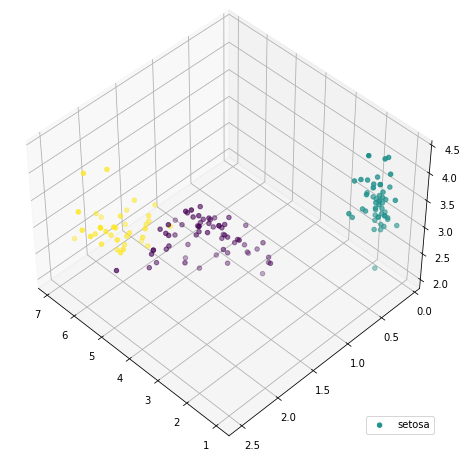

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .9, 1], elev=45, azim=135)
ax.scatter(iris.data[:, 2], iris.data[:, 3], iris.data[:, 1], c=iris.target)
plt.legend(labels= iris.target_names.tolist(), loc='lower right')
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .9, 1], elev=45, azim=135)
ax.scatter(iris.data[:, 2], iris.data[:, 3], iris.data[:, 1], c=model.labels_)
plt.legend(labels= iris.target_names.tolist(), loc='lower right')
plt.show()
